In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Import
We will use pandas function to imoprt the dataset for the futher procedure..

In [3]:
df = pd.read_csv("MetroHealth.csv")

In [5]:
# viewing the dataset first samples for understanding data
df.head()

,Unnamed: 0,City,NumMDs,RateMDs,NumHospitals,NumBeds,RateBeds,NumMedicare,PctChangeMedicare,MedicareRate,SSBNum,SSBRate,SSBChange,NumRetired,SSINum,SSIRate,SqrtMDs
0,1,"Holland-Grand Haven, MI",349,140,3,316,127,29533,8.3,11835,34135,13679,8.1,23165,2070,820,18.6815
1,2,"Louisville, KY-IN",4042,340,18,3909,328,173845,3.0,14606,202485,17013,3.0,118920,29017,2416,63.5767
2,3,"Battle Creek, MI",256,184,3,517,372,22972,2.4,16539,27245,19615,3.3,16645,4095,2945,16.0000
3,4,"Madison, WI",2679,510,7,1467,279,60530,5.2,11528,68705,13085,4.9,47085,6492,1221,51.7591
4,5,"Fort Smith, AR-OK",502,179,8,975,348,45185,4.6,16146,55370,19785,5.8,29415,9313,3301,22.4054


For getting the information about data

In [17]:
#checking shape of dataset
df.shape

(83, 17)

Means 83 rows and 17 columns

In [18]:
#now to get the names of the columns present in the dataset
df.columns

Index(['Unnamed: 0', 'City', 'NumMDs', 'RateMDs', 'NumHospitals', 'NumBeds',
       'RateBeds', 'NumMedicare', 'PctChangeMedicare', 'MedicareRate',
       'SSBNum', 'SSBRate', 'SSBChange', 'NumRetired', 'SSINum', 'SSIRate',
       'SqrtMDs'],
      dtype='object')

In [6]:
df.describe()

,Unnamed: 0,NumMDs,RateMDs,NumHospitals,NumBeds,RateBeds,NumMedicare,PctChangeMedicare,MedicareRate,SSBNum,SSBRate,SSBChange,NumRetired,SSINum,SSIRate,SqrtMDs
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,42.000000,1643.325301,283.240964,7.192771,1517.084337,311.626506,73290.325301,4.531325,14698.951807,84185.481928,16971.132530,4.485542,53179.337349,12025.000000,2352.783133,34.998508
std,24.103942,1981.431751,112.169687,6.383014,1496.383699,116.447697,74179.850728,3.164511,3534.798379,83754.252421,3904.452948,3.034321,54719.966357,13813.646851,865.193226,20.579919
min,1.000000,143.000000,104.000000,2.000000,141.000000,102.000000,10306.000000,-2.200000,8240.000000,11245.000000,10068.000000,-1.800000,6775.000000,1495.000000,820.000000,11.958300
25%,21.500000,336.500000,190.500000,2.000000,467.000000,219.000000,23049.500000,2.350000,12033.000000,26922.500000,14116.000000,2.400000,16842.500000,3525.000000,1769.500000,18.343700
50%,42.000000,844.000000,267.000000,5.000000,975.000000,299.000000,46661.000000,4.600000,14279.000000,55110.000000,16205.000000,4.700000,35070.000000,6725.000000,2308.000000,29.051700
75%,62.500000,2018.000000,351.500000,10.000000,1901.000000,374.500000,84618.000000,6.000000,16925.500000,101140.000000,19863.500000,5.900000,61362.500000,15077.000000,2762.000000,44.922200
max,83.000000,9410.000000,743.000000,32.000000,6177.000000,641.000000,330821.000000,12.800000,25474.000000,380405.000000,27674.000000,13.500000,254260.000000,72225.000000,4746.000000,97.005200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         83 non-null     int64  
 1   City               83 non-null     object 
 2   NumMDs             83 non-null     int64  
 3   RateMDs            83 non-null     int64  
 4   NumHospitals       83 non-null     int64  
 5   NumBeds            83 non-null     int64  
 6   RateBeds           83 non-null     int64  
 7   NumMedicare        83 non-null     int64  
 8   PctChangeMedicare  83 non-null     float64
 9   MedicareRate       83 non-null     int64  
 10  SSBNum             83 non-null     int64  
 11  SSBRate            83 non-null     int64  
 12  SSBChange          83 non-null     float64
 13  NumRetired         83 non-null     int64  
 14  SSINum             83 non-null     int64  
 15  SSIRate            83 non-null     int64  
 16  SqrtMDs            83 non-nu

# Step 2: Data Cleaning

### Firstly lets check if we have any NULL values

In [9]:
#for better understanding lets make a new dataframe of null values
df_null = df[df.isna()]

In [10]:
df_null

,Unnamed: 0,City,NumMDs,RateMDs,NumHospitals,NumBeds,RateBeds,NumMedicare,PctChangeMedicare,MedicareRate,SSBNum,SSBRate,SSBChange,NumRetired,SSINum,SSIRate,SqrtMDs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         83 non-null     int64  
 1   City               83 non-null     object 
 2   NumMDs             83 non-null     int64  
 3   RateMDs            83 non-null     int64  
 4   NumHospitals       83 non-null     int64  
 5   NumBeds            83 non-null     int64  
 6   RateBeds           83 non-null     int64  
 7   NumMedicare        83 non-null     int64  
 8   PctChangeMedicare  83 non-null     float64
 9   MedicareRate       83 non-null     int64  
 10  SSBNum             83 non-null     int64  
 11  SSBRate            83 non-null     int64  
 12  SSBChange          83 non-null     float64
 13  NumRetired         83 non-null     int64  
 14  SSINum             83 non-null     int64  
 15  SSIRate            83 non-null     int64  
 16  SqrtMDs            83 non-nu

## As total enteries were 83 and every column has 83 non null enteries so that means we do not have any row with null values

### Now Lets check if we have dupliacte values

In [15]:
#we will make the new dataframe for the duplicate enteries
df[df.duplicated()] 

,Unnamed: 0,City,NumMDs,RateMDs,NumHospitals,NumBeds,RateBeds,NumMedicare,PctChangeMedicare,MedicareRate,SSBNum,SSBRate,SSBChange,NumRetired,SSINum,SSIRate,SqrtMDs


### As the duplicated dataframe is null so that means we do not have any duplicate enteries in the dataset...

In [21]:
df.head()

,Unnamed: 0,City,NumMDs,RateMDs,NumHospitals,NumBeds,RateBeds,NumMedicare,PctChangeMedicare,MedicareRate,SSBNum,SSBRate,SSBChange,NumRetired,SSINum,SSIRate,SqrtMDs
0,1,"Holland-Grand Haven, MI",349,140,3,316,127,29533,8.3,11835,34135,13679,8.1,23165,2070,820,18.6815
1,2,"Louisville, KY-IN",4042,340,18,3909,328,173845,3.0,14606,202485,17013,3.0,118920,29017,2416,63.5767
2,3,"Battle Creek, MI",256,184,3,517,372,22972,2.4,16539,27245,19615,3.3,16645,4095,2945,16.0000
3,4,"Madison, WI",2679,510,7,1467,279,60530,5.2,11528,68705,13085,4.9,47085,6492,1221,51.7591
4,5,"Fort Smith, AR-OK",502,179,8,975,348,45185,4.6,16146,55370,19785,5.8,29415,9313,3301,22.4054


### We have a extra column named Unnamed representing index that is of no use so we have to drop it

In [23]:
#dropping column with index 0 as the Unnamed has index 0
#inplace = True means make permanent changes to dataframe
df.drop(df.columns[0], axis = 1, inplace = True)

In [24]:
#now lets check again
df.head()

,City,NumMDs,RateMDs,NumHospitals,NumBeds,RateBeds,NumMedicare,PctChangeMedicare,MedicareRate,SSBNum,SSBRate,SSBChange,NumRetired,SSINum,SSIRate,SqrtMDs
0,"Holland-Grand Haven, MI",349,140,3,316,127,29533,8.3,11835,34135,13679,8.1,23165,2070,820,18.6815
1,"Louisville, KY-IN",4042,340,18,3909,328,173845,3.0,14606,202485,17013,3.0,118920,29017,2416,63.5767
2,"Battle Creek, MI",256,184,3,517,372,22972,2.4,16539,27245,19615,3.3,16645,4095,2945,16.0000
3,"Madison, WI",2679,510,7,1467,279,60530,5.2,11528,68705,13085,4.9,47085,6492,1221,51.7591
4,"Fort Smith, AR-OK",502,179,8,975,348,45185,4.6,16146,55370,19785,5.8,29415,9313,3301,22.4054


# Step 3: EDA

## For EDA Lets start with Finding the Correlation between the given Columns/Features of Dataset

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               83 non-null     object 
 1   NumMDs             83 non-null     int64  
 2   RateMDs            83 non-null     int64  
 3   NumHospitals       83 non-null     int64  
 4   NumBeds            83 non-null     int64  
 5   RateBeds           83 non-null     int64  
 6   NumMedicare        83 non-null     int64  
 7   PctChangeMedicare  83 non-null     float64
 8   MedicareRate       83 non-null     int64  
 9   SSBNum             83 non-null     int64  
 10  SSBRate            83 non-null     int64  
 11  SSBChange          83 non-null     float64
 12  NumRetired         83 non-null     int64  
 13  SSINum             83 non-null     int64  
 14  SSIRate            83 non-null     int64  
 15  SqrtMDs            83 non-null     float64
dtypes: float64(3), int64(12), ob

In [31]:
#firstly we have to make the df that should not have string data as first City column is of type string and we can only do correlation of numerical values
#for this we will use iloc function of pandas
df_numerical = df.iloc[:,1:]

In [32]:
df_numerical.head()

,NumMDs,RateMDs,NumHospitals,NumBeds,RateBeds,NumMedicare,PctChangeMedicare,MedicareRate,SSBNum,SSBRate,SSBChange,NumRetired,SSINum,SSIRate,SqrtMDs
0,349,140,3,316,127,29533,8.3,11835,34135,13679,8.1,23165,2070,820,18.6815
1,4042,340,18,3909,328,173845,3.0,14606,202485,17013,3.0,118920,29017,2416,63.5767
2,256,184,3,517,372,22972,2.4,16539,27245,19615,3.3,16645,4095,2945,16.0000
3,2679,510,7,1467,279,60530,5.2,11528,68705,13085,4.9,47085,6492,1221,51.7591
4,502,179,8,975,348,45185,4.6,16146,55370,19785,5.8,29415,9313,3301,22.4054


In [33]:
correlation_matrix = df_numerical.corr()

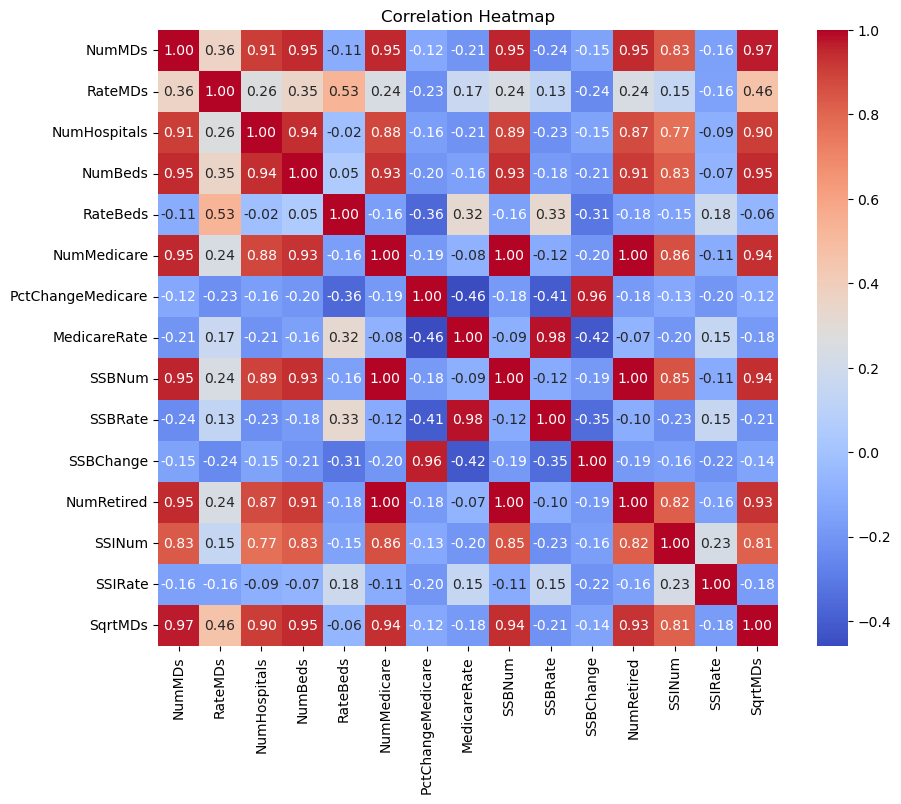

In [34]:
#Now Creating a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

So we have 15x15 map..
In these numbers that represent correlation..
### 1 means Two columns/features have strong correlation with one another or have positive correlation if number is positive and near to 1.

### 0 means there is no correlation between two columns.

### -1 means there is negative/ opposite relation/correlation between two columns

In [35]:
df.columns

Index(['City', 'NumMDs', 'RateMDs', 'NumHospitals', 'NumBeds', 'RateBeds',
       'NumMedicare', 'PctChangeMedicare', 'MedicareRate', 'SSBNum', 'SSBRate',
       'SSBChange', 'NumRetired', 'SSINum', 'SSIRate', 'SqrtMDs'],
      dtype='object')

### Pattern 1: Lets check which City has most numbers of Physicians

In [45]:
#for this we will use idmax() to get location of it and then we will use loc() to get details of whole row from that location
city_with_highest_physicians = df.loc[df['NumMDs'].idxmax()]

In [44]:
city_with_highest_physicians

City                 Minneapolis-St. Paul-Bloomington, MN-WI
NumMDs                                                  9410
RateMDs                                                  305
NumHospitals                                              32
NumBeds                                                 6177
RateBeds                                                 200
NumMedicare                                           330821
PctChangeMedicare                                        4.6
MedicareRate                                           10724
SSBNum                                                376260
SSBRate                                                12197
SSBChange                                                4.7
NumRetired                                            254260
SSINum                                                 41751
SSIRate                                                 1340
SqrtMDs                                              97.0052
Name: 34, dtype: object

### Pattern 2: Lets check which City has Minimum numbers of Physicians

In [46]:
#we will use NumMDs and we will get foull details of that city
city_with_lowest_numbers_of_physicians = df.loc[df['NumMDs'].idxmin()]

In [47]:
city_with_lowest_numbers_of_physicians

City                 Lewiston, ID-WA
NumMDs                           143
RateMDs                          245
NumHospitals                       2
NumBeds                          197
RateBeds                         338
NumMedicare                    11311
PctChangeMedicare                6.1
MedicareRate                   19411
SSBNum                         13140
SSBRate                        22549
SSBChange                        5.1
NumRetired                      8095
SSINum                          1495
SSIRate                         2549
SqrtMDs                      11.9583
Name: 22, dtype: object

## Pattern 3: Lets check which city has highest numbers of Hospitals

In [48]:
#for this we will use idmax() to get location of it and then we will use loc() to get details of whole row from that location
city_with_max_hospitals = df.loc[df['NumHospitals'].idxmax()]

In [49]:
city_with_max_hospitals

City                 Minneapolis-St. Paul-Bloomington, MN-WI
NumMDs                                                  9410
RateMDs                                                  305
NumHospitals                                              32
NumBeds                                                 6177
RateBeds                                                 200
NumMedicare                                           330821
PctChangeMedicare                                        4.6
MedicareRate                                           10724
SSBNum                                                376260
SSBRate                                                12197
SSBChange                                                4.7
NumRetired                                            254260
SSINum                                                 41751
SSIRate                                                 1340
SqrtMDs                                              97.0052
Name: 34, dtype: object

### Analysis 1 / Interpretation 1: So max hospitals are 32 and they are in Minneapolis-St. Paul-Bloomington, MN-WI, so thats why they have maximum numbers of Physicians present.

### Pattern 4: Lets check minimum numbers of Hospitals in a City and details 

In [50]:
#for this we will use idmin() to get location with minimum value of it and then we will use loc() to get details of whole row from that location
city_with_minimum_hospitals = df.loc[df['NumHospitals'].idxmin()]

In [51]:
city_with_minimum_hospitals

City                 Anderson, IN
NumMDs                        200
RateMDs                       153
NumHospitals                    2
NumBeds                       231
RateBeds                      176
NumMedicare                 22828
PctChangeMedicare             1.1
MedicareRate                17408
SSBNum                      26740
SSBRate                     20391
SSBChange                     1.1
NumRetired                  17040
SSINum                       2717
SSIRate                      2080
SqrtMDs                   14.1421
Name: 6, dtype: object

## Pattern 5: Average number of Physician per Hospital Bed

In [54]:
# Calculate the average number of physicians per hospital bed
df['AvgPhysiciansPerBed'] = df['NumMDs'] / df['NumBeds']

# Calculate statistics for the new column
avg_physicians_per_bed_mean = df['AvgPhysiciansPerBed'].mean()


In [55]:
avg_physicians_per_bed_mean

0.9731120007167072

# Step 4: Visualization

## A scatter plot to show relation between Number of Physicians and Number of Beds

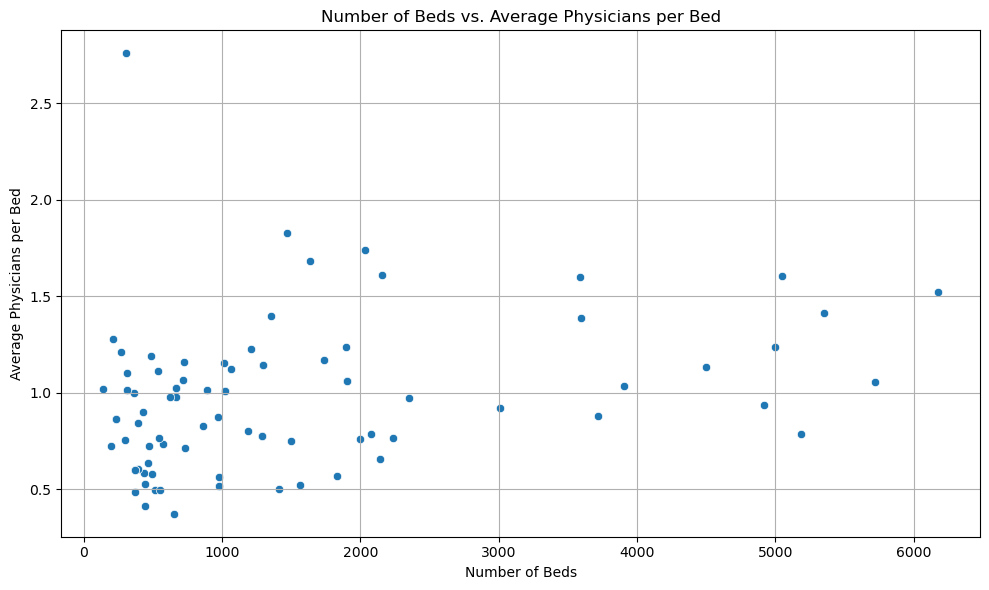

In [67]:
# Create a scatter plot to visualize the relationship between NumBeds and AvgPhysiciansPerBed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumBeds', y='AvgPhysiciansPerBed', data=df)
plt.title('Number of Beds vs. Average Physicians per Bed')
plt.xlabel('Number of Beds')
plt.ylabel('Average Physicians per Bed')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate correlation between NumBeds and AvgPhysiciansPerBed
correlation = df['NumBeds'].corr(df['AvgPhysiciansPerBed'])


# Interpretation: In areas with more hospital beds, there tends to be a higher average number of physicians per bed. This could indicate that areas with larger healthcare infrastructure have more medical staff available to cater to the increased number of beds.

## A scatter plot to show relation between NumHospitals and NumMedicare

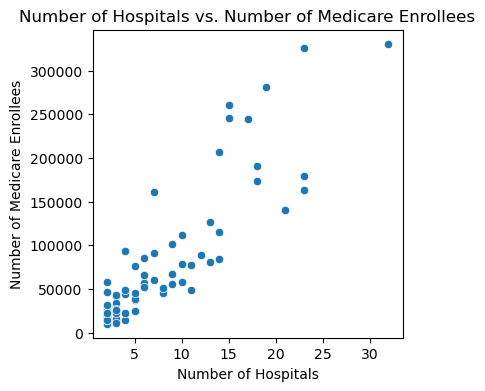

In [63]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='NumHospitals', y='NumMedicare', data=df)
plt.title('Number of Hospitals vs. Number of Medicare Enrollees')
plt.xlabel('Number of Hospitals')
plt.ylabel('Number of Medicare Enrollees')
plt.show()

##  top 10 cities with the highest number of Medicare enrollees

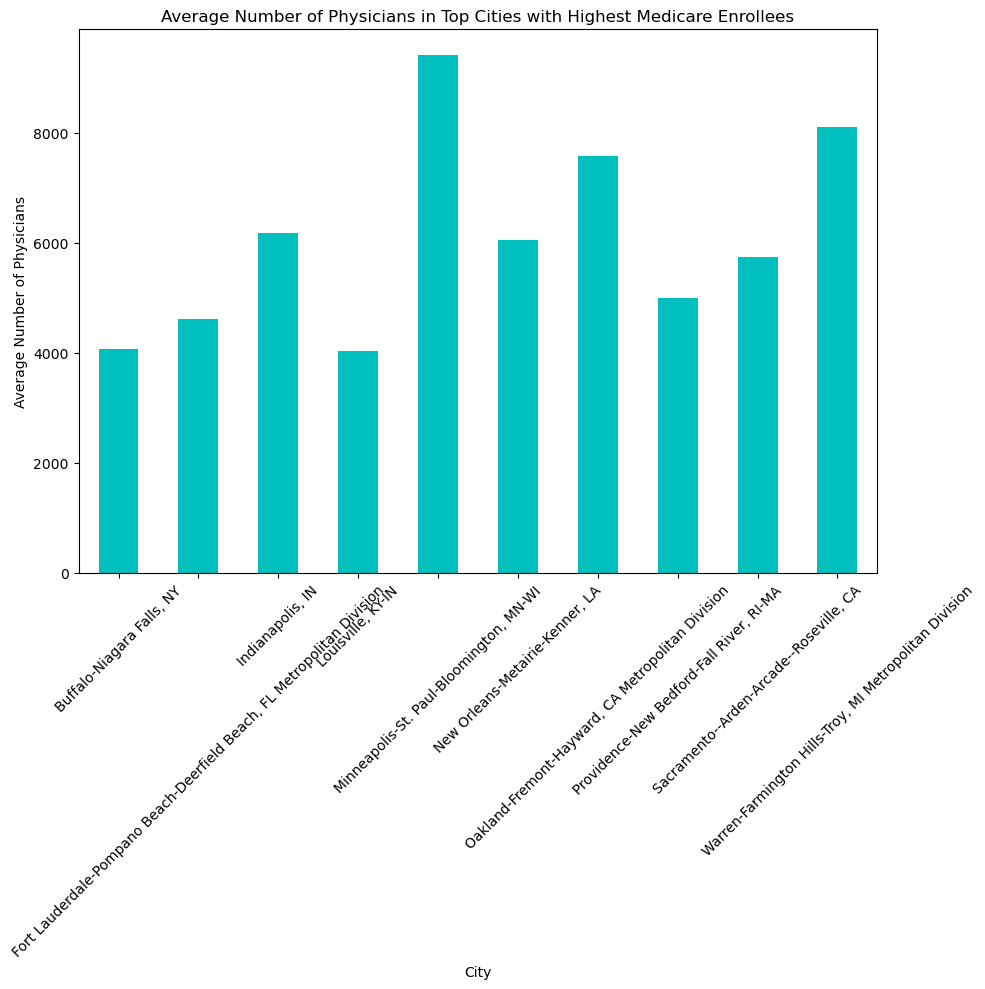

In [66]:
# Calculate the average number of physicians for the top cities with highest Medicare enrollees
top_cities = df.nlargest(10, 'NumMedicare')  # Get top 10 cities with highest NumMedicare
avg_physicians_by_city = top_cities.groupby('City')['NumMDs'].mean()

# Create a bar plot
plt.figure(figsize=(10,10))
avg_physicians_by_city.plot(kind='bar', color='c')
plt.title('Average Number of Physicians in Top Cities with Highest Medicare Enrollees')
plt.xlabel('City')
plt.ylabel('Average Number of Physicians')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Interpretaion 2: Supply and Demand in Healthcare: The bar plot comparing the average number of physicians in cities with the highest Medicare enrollees shows that there could be a relationship between the demand for healthcare services (indicated by high Medicare enrollees) and the supply of physicians. Cities with a high number of Medicare enrollees might have a higher average number of physicians, suggesting that healthcare services are aligned with the demand.

## Number of Physician in Lousiville is 4042 which is a high Number